In [1]:
!git clone https://github.com/saisriteja/sample_paleru.git

Cloning into 'sample_paleru'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 1819 (delta 6), reused 14 (delta 4), pack-reused 1803
Receiving objects: 100% (1819/1819), 367.79 MiB | 36.54 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (1783/1783), done.


In [2]:
%tensorflow_version 1.x
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,Bidirectional,LSTM,Reshape,CuDNNLSTM,BatchNormalization,Flatten,Dropout,Dense
from keras.layers import add
from keras.utils import plot_model

TensorFlow 1.x selected.


Using TensorFlow backend.


In [3]:
input  = Input(shape = (256,256*4,1))

c1 = Conv2D(64, (7,7), padding='same',strides=2,activation='relu', kernel_initializer='he_normal')(input)
a1 = Activation('relu')(c1)

c2 = conv1 = Conv2D(32, (3,3),strides=2, padding='same', kernel_initializer='he_normal')(input)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)

c3 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal')(a2)
b3 = BatchNormalization()(c3)
a3 = Activation('relu')(b3)

c4 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal')(a3)
b4 = BatchNormalization()(c4)

m1  = add([a1, b4])
a4 = Activation('relu')(m1)


#-----------------------------------------------layer 2----------------------------------------------------------------------------

c1 = Conv2D(128, (3,3),strides=2, padding='same',activation='relu', kernel_initializer='he_normal')(a4)
a1 = Activation('relu')(c1)

c2 = conv1 = Conv2D(64, (3,3),strides=2, padding='same', kernel_initializer='he_normal')(a4)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)

c3 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal')(a2)
b3 = BatchNormalization()(c3)
a3 = Activation('relu')(b3)


c4 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal')(a3)
b4 = BatchNormalization()(c4)

m1  = add([c1, b4])
a4 = Activation('relu')(m1)

#----------------------------------------------layer 3------------------------------------------------------------------------------

c1 = Conv2D(128, (3,3),strides = (1,2) ,padding='same',activation='relu', kernel_initializer='he_normal')(a4)
a1 = Activation('relu')(c1)

c2 = conv1 = Conv2D(128, (3,3),strides = (1,2), padding='same', kernel_initializer='he_normal')(a4)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)

c3 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal')(a2)
b3 = BatchNormalization()(c3)
a3 = Activation('relu')(b3)


c4 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal')(a3)
b4 = BatchNormalization()(c4)

m1  = add([c1, b4])
a4 = Activation('relu')(m1)

#-------------------------------------------layer 4---------------------------------------------------------------------------------

c1 = Conv2D(64, (3,3),strides = (2,2) ,padding='same',activation='relu', kernel_initializer='he_normal')(a4)
a1 = Activation('relu')(c1)

c2 = conv1 = Conv2D(128, (3,3),strides = (2,2), padding='same', kernel_initializer='he_normal')(a4)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)

c3 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal')(a2)
b3 = BatchNormalization()(c3)
a3 = Activation('relu')(b3)


c4 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal')(a3)
b4 = BatchNormalization()(c4)

m1  = add([c1, b4])
a4 = Activation('relu')(m1)

#-------------------------------------------layer 5-----------------------------------------------------------------------------------
c1 = Conv2D(32, (3,3),strides = (2,2) ,padding='same',activation='relu', kernel_initializer='he_normal')(a4)
a1 = Activation('relu')(c1)

c2 = conv1 = Conv2D(64, (3,3),strides = (2,2), padding='same', kernel_initializer='he_normal')(a4)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)

c3 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal')(a2)
b3 = BatchNormalization()(c3)
a3 = Activation('relu')(b3)


c4 = conv1 = Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal')(a3)
b4 = BatchNormalization()(c4)

m1  = add([c1, b4])
a4 = Activation('relu')(m1)

#-----------------------------------------layer 6-------------------------------------------------------------------------
c1 = Conv2D(16, (3,3),strides = (2,2) ,padding='same',activation='relu', kernel_initializer='he_normal')(a4)
a1 = Activation('relu')(c1)

c2 = conv1 = Conv2D(32, (3,3),strides = (2,2), padding='same', kernel_initializer='he_normal')(a4)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)

c3 = conv1 = Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal')(a2)
b3 = BatchNormalization()(c3)
a3 = Activation('relu')(b3)


c4 = conv1 = Conv2D(16, (3,3), padding='same', kernel_initializer='he_normal')(a3)
b4 = BatchNormalization()(c4)

m1  = add([c1, b4])
a4 = Activation('relu')(m1)

f = Flatten()(a4)
f = Reshape((int(8192/4), 1))(f)

# #-----------------------------------------layer7---------------------------------------------------------------------------
bi1 = Bidirectional(CuDNNLSTM(512, return_sequences=True))(f)
d1  = Dropout(0.2)(bi1)

bi2 = Bidirectional(CuDNNLSTM(512))(d1)
d2 = Dropout(0.4)(bi2)

out = Dense(1,activation='sigmoid')(d2)

# create model
model = Model(inputs=input, outputs=out)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


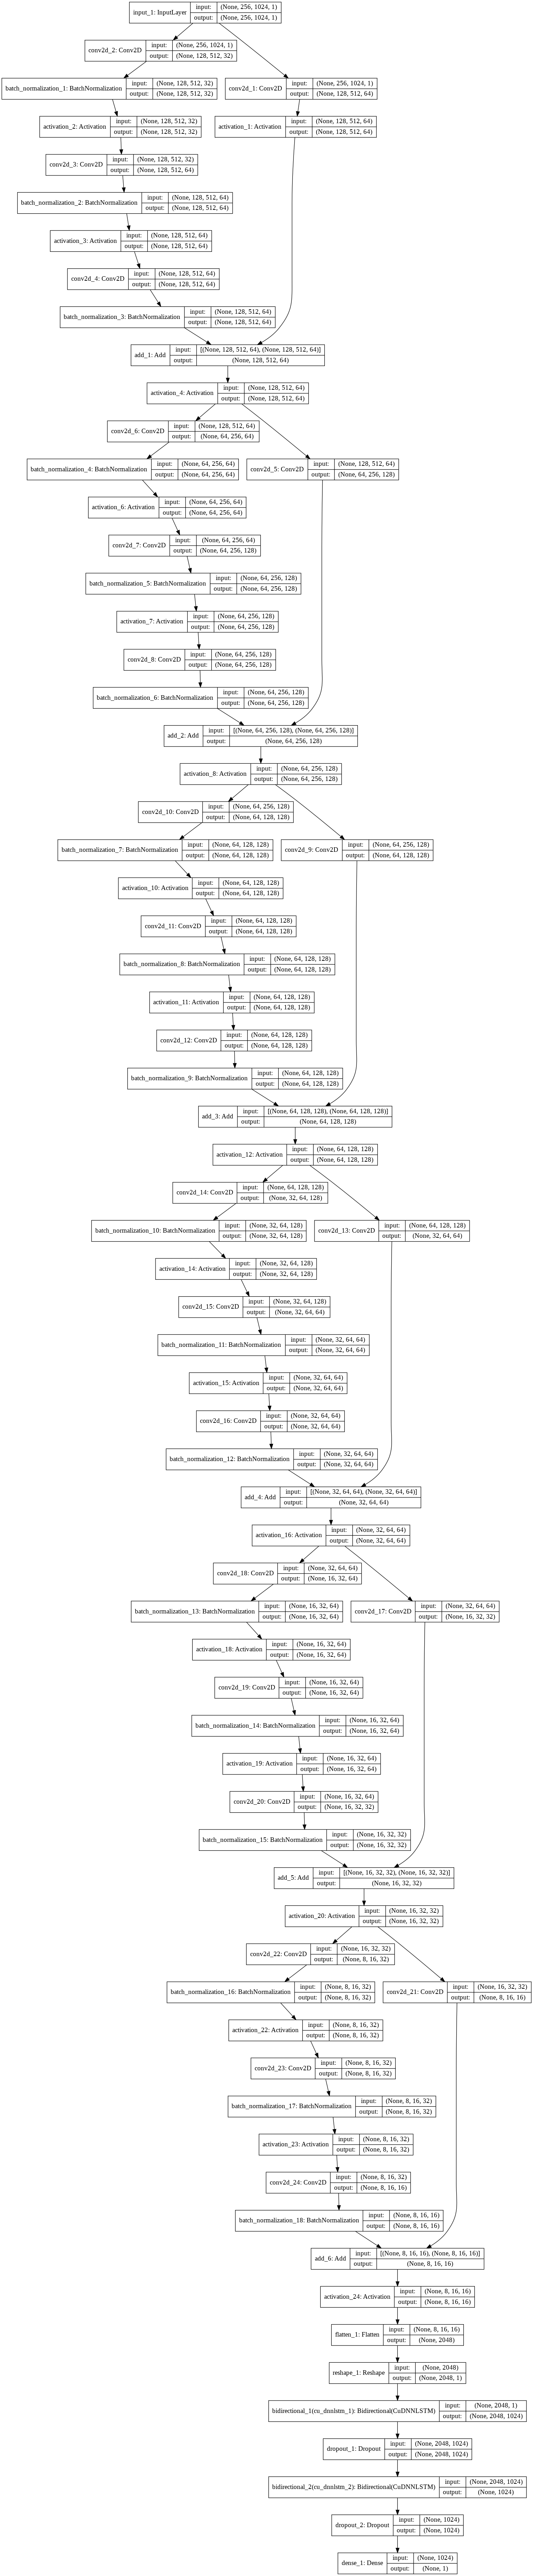

In [ ]:
plot_model(model, show_shapes=True, to_file='residual_module.png')

In [89]:
!pip install librosa

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [75]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [76]:
train_generator = train_datagen.flow_from_directory('/content/sample_paleru/spectrograms/training',
                                                      target_size=(256,256*4),
                                                      batch_size=16,
                                                      class_mode='binary',color_mode = 'grayscale',shuffle = True)
validation_generator = train_datagen.flow_from_directory('/content/sample_paleru/spectrograms/validation',
                                                      target_size=(256,256*4),
                                                      batch_size=16,
                                                      class_mode='binary',color_mode = 'grayscale',shuffle = True)


Found 699 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [77]:
train_generator.class_indices

{'fillers': 0, 'nonfillers': 1}

In [44]:
import numpy as np
np.unique(train_generator.classes, return_counts=True)

(array([0, 1], dtype=int32), array([275, 424]))

In [46]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_generator.classes),
                                                 train_generator.classes,)

In [48]:
from keras import optimizers
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [50]:
import keras.callbacks

In [51]:
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=2, monitor="val_loss"),
    keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    # keras.callbacks.TensorBoard(log_dir='./logs'),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.1,patience=3)

]

In [52]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50,
                              class_weight=class_weights,
                              callbacks = my_callbacks)

Epoch 1/30
100/100 [==============================] - 191s 2s/step - loss: 0.6764 - acc: 0.6006 - val_loss: 0.7542 - val_acc: 0.2674
Epoch 2/30
100/100 [==============================] - 184s 2s/step - loss: 0.6586 - acc: 0.6075 - val_loss: 0.8227 - val_acc: 0.2673
Epoch 3/30
100/100 [==============================] - 185s 2s/step - loss: 0.6086 - acc: 0.6732 - val_loss: 0.6107 - val_acc: 0.6079
Epoch 4/30
100/100 [==============================] - 186s 2s/step - loss: 0.3005 - acc: 0.8704 - val_loss: 0.6738 - val_acc: 0.5116
Epoch 5/30
100/100 [==============================] - 185s 2s/step - loss: 0.1395 - acc: 0.9491 - val_loss: 0.2864 - val_acc: 0.6637
Epoch 6/30
100/100 [==============================] - 185s 2s/step - loss: 0.1216 - acc: 0.9571 - val_loss: 1.2456 - val_acc: 0.6050
Epoch 7/30
100/100 [==============================] - 185s 2s/step - loss: 0.1103 - acc: 0.9660 - val_loss: 2.8365 - val_acc: 0.5828


In [57]:
testing  = train_datagen.flow_from_directory('/content/sample_paleru/spectrograms/validation',
                                                      target_size=(256,256*4),
                                                      batch_size=41,
                                                      class_mode='binary',color_mode = 'grayscale',shuffle = True)

Found 41 images belonging to 2 classes.


In [71]:
model.load_weights('/content/model.01-0.75.h5')

In [72]:
predictions = model.predict_generator(testing)

In [78]:
from sklearn import metrics
val_preds = np.argmax(predictions, axis=-1)
val_trues = testing.classes
labels = testing.class_indices.keys()
print(labels,val_trues,val_preds)
# precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(val_trues, val_preds, labels=labels)

dict_keys(['fillers', 'nonfillers']) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [79]:
import pandas as pd
data  = pd.read_excel('/content/sample_paleru/UCLASS.xlsx')

In [80]:
data = data.fillna(False)
data = data[data['Text'] != False]

In [81]:
name = data['Name'].to_list()
name = [n.split('\\')[-1].split('_id')[0] for n in name]
data['Name'] = name

In [82]:
data.shape

(699, 10)

In [83]:
len(data['Name'].unique())

21

In [84]:
from glob import glob
imgs = glob('/content/sample_paleru/spectrograms/validation/fillers/*.png')

In [85]:
imgs[0]

'/content/sample_paleru/spectrograms/validation/fillers/f-11.png'

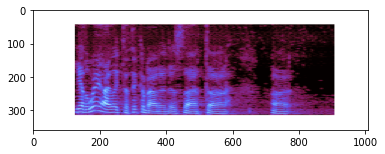

In [86]:
import cv2
import matplotlib.pyplot as plt
plt.imshow(cv2.imread(imgs[0],1))

In [88]:
cv2.imread(imgs[0],1).shape

(360, 1008, 3)